 Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
 on the test set. Hint: the KNeighborsClassifier works quite well for this task;
 you just need to find good hyperparameter values (try a grid search on the
 weights and n_neighbors hyperparameters).

In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist = load_digits()
# load dataset

In [4]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
pd.DataFrame(mnist.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
pd.DataFrame(mnist.target).head()

,0
0,0
1,1
2,2
3,3
4,4


In [7]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


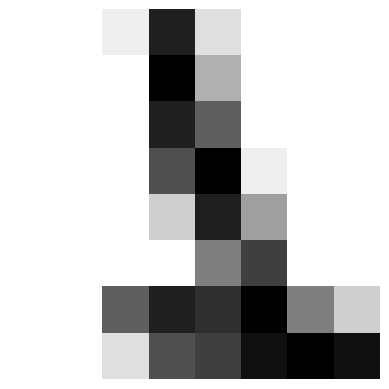

In [8]:
some_digit = X[1000]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [9]:
y[1000]

1

In [10]:
 X_train, X_test, y_train, y_test = X[:1000], X[1000:], y[:1000], y[1000:]

In [14]:
 import numpy as np
 shuffle_index = np.random.permutation(1000)
 X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [30]:
# Scale the data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 4 , 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

# Set up the grid search
grid_search = GridSearchCV(knn, param_grid, cv=3, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_knn = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Test accuracy: {accuracy:.4f}")

Best hyperparameters: {'n_neighbors': 4, 'weights': 'distance'}
Test accuracy: 0.9398


In [32]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [54]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=40)  # Reduce dimensions to 40 (you can experiment with this)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Set up the KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 4 , 5, 7, 9, 11],  # Expanding the range of neighbors
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan','minkowski'],  # Experiment with different distance metrics
    'algorithm':['auto'],
    'leaf_size':[30],
    'p' : [2],

}

# Set up the grid search
grid_search = GridSearchCV(knn, param_grid, cv=3, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and model
best_knn = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Test accuracy: {accuracy:.4f}")

Best hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Test accuracy: 0.9410


In [82]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# # Load MNIST dataset
# digits = datasets.load_digits()
# X, y = digits.data, digits.target

# # Split dataset into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data (try MinMaxScaler instead of StandardScaler)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction (experiment with more components)
pca = PCA(n_components=50)  # Try 50 components or even 64
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Set up the KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters to tune (wider range of n_neighbors)
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],  # Expanded range
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

# Set up the grid search
grid_search = GridSearchCV(knn, param_grid, cv=3, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and model
best_knn = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Test accuracy: {accuracy:.4f}")


Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test accuracy: 0.9561


In [84]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# # Load MNIST dataset
# digits = datasets.load_digits()
# X, y = digits.data, digits.target

# # Split dataset into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data (try MinMaxScaler instead of StandardScaler)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction (use 64 components)
pca = PCA(n_components=64)  # Increase to 64 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Set up the KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters to tune (wider range of n_neighbors)
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],  # Expanded range
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

# Set up the grid search
grid_search = GridSearchCV(knn, param_grid, cv=3, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and model
best_knn = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Test accuracy: {accuracy:.4f}")


Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Test accuracy: 0.9624


 Write a function that can shift an MNIST image in any direction (left, right, up,
 or down) by one pixel. Then, for each image in the training set, create four shif
ted copies (one per direction) and add them to the training set. Finally, train your
 best model on this expanded training set and measure its accuracy on the test set.
 You should observe that your model performs even better now! This technique of
 artificially growing the training set is called data augmentation or training set
 expansion

You can use the shift() function from the scipy.ndimage.interpolation module. For example,
 shift(image, [2, 1], cval=0) shifts the image 2 pixels down and 1 pixel to the right.

In [110]:
import numpy as np
from scipy.ndimage import shift
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Load MNIST dataset (or use the 'digits' dataset as an example)
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to shift images
def shift_image(image, direction):
    if direction == 'up':
        return shift(image.reshape(8, 8), [-1, 0], cval=0).reshape(-1)  # Shift up
    elif direction == 'down':
        return shift(image.reshape(8, 8), [1, 0], cval=0).reshape(-1)  # Shift down
    elif direction == 'left':
        return shift(image.reshape(8, 8), [0, -1], cval=0).reshape(-1)  # Shift left
    elif direction == 'right':
        return shift(image.reshape(8, 8), [0, 1], cval=0).reshape(-1)  # Shift right
    return image

# Create augmented dataset by shifting images
X_train_augmented = X_train.copy()
y_train_augmented = y_train.copy()

for i in range(X_train.shape[0]):
    for direction in ['up', 'down', 'left', 'right']:
        shifted_image = shift_image(X_train[i], direction)
        X_train_augmented = np.vstack([X_train_augmented, shifted_image])
        y_train_augmented = np.append(y_train_augmented, y_train[i])

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_augmented)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=64)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')
knn.fit(X_train_pca, y_train_augmented)

# Evaluate the model on the test set
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy after data augmentation: {accuracy:.4f}")


Test accuracy after data augmentation: 0.9889


The provided function `shift_image` takes an image and a direction as input and returns the image shifted in the specified direction by **one pixel**. This function utilizes the `shift` function from the `scipy.ndimage.interpolation` module to perform the shifting operation. Here's a detailed breakdown of how it works:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.shift.html#scipy.ndimage.shift

---

### **Parameters**
1. **`image`**:
   - A single image from the MNIST (or other digit dataset).
   - Assumes the image is initially a flattened 1D array of 64 pixels (e.g., `8x8` reshaped into 1D).

2. **`direction`**:
   - Specifies the direction to shift the image. It can take one of the following values:
     - `'up'`: Move the image 1 pixel upwards.
     - `'down'`: Move the image 1 pixel downwards.
     - `'left'`: Move the image 1 pixel to the left.
     - `'right'`: Move the image 1 pixel to the right.

---

### **Steps in the Function**
1. **Reshape the Input Image**:
   - The input `image` is reshaped from a flat 1D array (e.g., `64x1`) back into its 2D grid format (e.g., `8x8`) using `image.reshape(8, 8)`. This allows pixel manipulations within the grid.

2. **Shift Based on Direction**:
   - The function uses the `shift` function to move the image in the specified direction:
     - **`[y, x]` argument in `shift`**:
       - The first element (`y`) controls vertical shifting:
         - `-1` shifts **up**.
         - `1` shifts **down**.
       - The second element (`x`) controls horizontal shifting:
         - `-1` shifts **left**.
         - `1` shifts **right**.
     - **`cval=0`**: Ensures that the empty areas created by the shift are filled with `0` (black).

3. **Reshape Back**:
   - The shifted 2D grid is flattened back into a 1D array using `.reshape(-1)` for consistency with the input format.

4. **Return Shifted Image**:
   - Returns the shifted version of the image for the specified direction.

---

### **Example Walkthrough**
Suppose we have an `8x8` grid representing a digit. Here is what happens for each direction:

- **Input Grid**:
  ```
  [Original 8x8 Grid of Pixels]
  ```

- **Shifting 'up'**:
  - The top row is removed, and a new row of zeros is added at the bottom.
  - Shift vector: `[-1, 0]`.

- **Shifting 'down'**:
  - The bottom row is removed, and a new row of zeros is added at the top.
  - Shift vector: `[1, 0]`.

- **Shifting 'left'**:
  - The leftmost column is removed, and a new column of zeros is added to the right.
  - Shift vector: `[0, -1]`.

- **Shifting 'right'**:
  - The rightmost column is removed, and a new column of zeros is added to the left.
  - Shift vector: `[0, 1]`.

---

### **Applications**
1. **Data Augmentation**:
   - By applying this function to all training images in different directions (`'up'`, `'down'`, `'left'`, `'right'`), we can artificially expand the training dataset. This helps the model learn invariance to minor shifts and improves its generalization ability.

2. **Improving Model Accuracy**:
   - Adding shifted versions of the training images to the dataset can improve the robustness of models, especially on digit recognition tasks like MNIST, as they become better at handling misaligned images.

---

### **Notes**
- Make sure to import the required library:
  ```python
  from scipy.ndimage import shift
  ```
- This code assumes an **8x8** image size (as in `digits` dataset). For larger images like MNIST (`28x28`), modify the `reshape` arguments accordingly.

# Understand till here

In [88]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# # Load MNIST dataset
# digits = datasets.load_digits()
# X, y = digits.data, digits.target

# # Split dataset into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data (try MinMaxScaler instead of StandardScaler)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction (use 64 components or more)
pca = PCA(n_components=64)  # Increase to 64 components or even higher if necessary
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Set up the KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters to tune (wider range of n_neighbors)
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 30],  # Expanded range
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Experiment with Minkowski too
}

# Set up the grid search
grid_search = GridSearchCV(knn, param_grid, cv=3, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and model
best_knn = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Test accuracy: {accuracy:.4f}")


Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Test accuracy: 0.9624


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, n_jobs=-1)
grid_search_rf.fit(X_train_pca, y_train)

# Best model and accuracy
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_pca)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Best hyperparameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Random Forest Test accuracy: {rf_accuracy:.4f}")


Best hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}
Random Forest Test accuracy: 0.9285


In [92]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize SVM with RBF kernel
svm = SVC(random_state=42)

# Hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

# Grid Search
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=3, n_jobs=-1)
grid_search_svm.fit(X_train_pca, y_train)

# Best model and accuracy
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_pca)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"Best hyperparameters for SVM: {grid_search_svm.best_params_}")
print(f"SVM Test accuracy: {svm_accuracy:.4f}")


Best hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Test accuracy: 0.9573


In [98]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize SVM with RBF kernel
svm = SVC(random_state=42)

# Hyperparameter grid for SVM (with lower C and other gamma values)
# param_grid_svm = {
#     'C': [1, 5, 10, 20],
#     'gamma': ['scale', 'auto', 0.1, 0.01],
#     'kernel': ['rbf']
# }

param_grid_svm = {
    'C': [1, 5, 10, 20],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf']
}


# Grid Search
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=3, n_jobs=-1)
grid_search_svm.fit(X_train_pca, y_train)

# Best model and accuracy
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_pca)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"Best hyperparameters for SVM: {grid_search_svm.best_params_}")
print(f"SVM Test accuracy: {svm_accuracy:.4f}")


Best hyperparameters for SVM: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Test accuracy: 0.9573


In [100]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize classifiers
svm = SVC(C=5, gamma='scale', kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')
rf = RandomForestClassifier(n_estimators=150, max_depth=20, min_samples_split=5, random_state=42)

# Combine classifiers into a voting ensemble
voting_clf = VotingClassifier(estimators=[('svm', svm), ('knn', knn), ('rf', rf)], voting='hard')

# Fit ensemble model
voting_clf.fit(X_train_pca, y_train)

# Evaluate the ensemble model
y_pred_voting = voting_clf.predict(X_test_pca)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print(f"Voting Classifier Test accuracy: {accuracy_voting:.4f}")


Voting Classifier Test accuracy: 0.9598


In [104]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Create base models for stacking
base_learners = [
    ('svm', SVC(C=5, gamma='scale', kernel='rbf', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')),
    ('rf', RandomForestClassifier(n_estimators=150, max_depth=20, min_samples_split=5, random_state=42))
]

# Meta-learner (logistic regression in this case)
meta_learner = LogisticRegression()

# Create and train the stacking classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
stacking_clf.fit(X_train_pca, y_train)

# Evaluate
y_pred_stacking = stacking_clf.predict(X_test_pca)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

print(f"Stacking Classifier Test accuracy: {accuracy_stacking:.4f}")


Stacking Classifier Test accuracy: 0.9573


C:\Users\JYOTI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to match the input format of the CNN (28x28x1)
X_train_reshaped = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test_reshaped = X_test.reshape(-1, 28, 28, 1).astype('float32')

# Normalize the pixel values to be between 0 and 1
X_train_reshaped /= 255.0
X_test_reshaped /= 255.0

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
accuracy_cnn = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"CNN Test accuracy: {accuracy_cnn[1]:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8768 - loss: 0.4063 - val_accuracy: 0.9777 - val_loss: 0.0799
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9792 - loss: 0.0713 - val_accuracy: 0.9807 - val_loss: 0.0616
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9877 - loss: 0.0425 - val_accuracy: 0.9818 - val_loss: 0.0583
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9904 - loss: 0.0298 - val_accuracy: 0.9838 - val_loss: 0.0583
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9931 - loss: 0.0226 - val_accuracy: 0.9853 - val_loss: 0.0490
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9958 - loss: 0.0137 - val_accuracy: 0.9852 - val_loss: 0.0580
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9961 - loss: 0.0132 - val_accuracy: 0.9852 - val_loss: 0.0553
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step -